In [1]:
!pip install segmentation-models
!pip install tensorflow
!pip install keras

     |████████████████████████████████| 50 kB 6.8 MB/s 


In [2]:
%matplotlib inline


In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [4]:
# imports 
import tensorflow as tf
import segmentation_models as sm
import glob
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt
sm.set_framework('tf.keras')
sm.framework()

Segmentation Models: using `keras` framework.


'tf.keras'

In [5]:
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

SIZE_X = 512
SIZE_Y = 512

# Capture training image info as a list
train_images = []

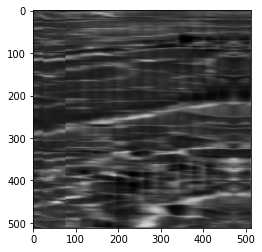

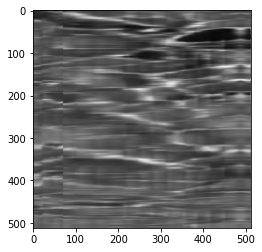

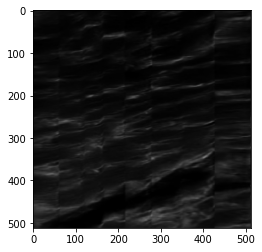

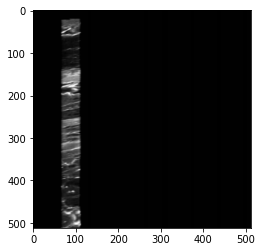

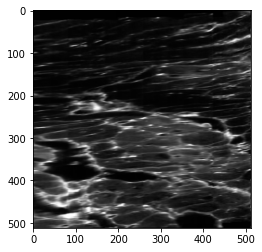

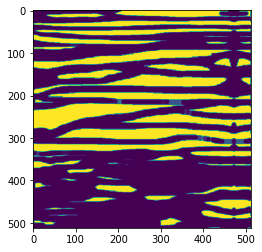

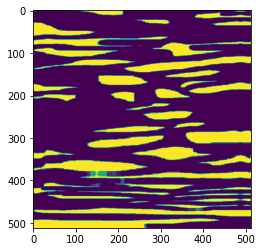

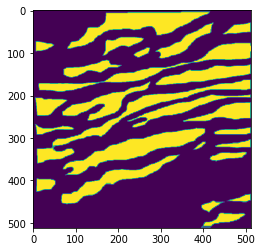

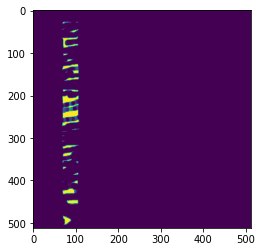

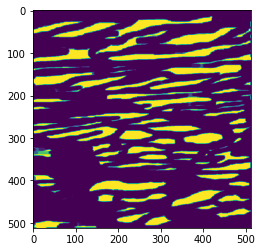

In [10]:
#print(os.listdir("membrane/train"))
from random import seed
from random import sample


seed(3)
sequence = [i for i in range(1200)]
subset = sample(sequence, 5)
train_images = []

for directory_path in glob.glob("/content/gdrive/MyDrive/REUProject2021/images_long_axis/augmented_images"):
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        #print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        train_images.append(img)
        #train_labels.append(label)

for i in range(5):
  plt.figure()
  plt.imshow(train_images[subset[i]])
  plt.show()

train_images = np.array(train_images)

#Capture mask/label info as a list
train_masks = [] 
for directory_path in glob.glob("/content/gdrive/MyDrive/REUProject2021/images_long_axis/augmented_masks_eroded"):
    for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
        mask = cv2.imread(mask_path, 0)       
        #mask = cv2.cvtColor(mask, cv2.COLOR_RGB2BGR)
        train_masks.append(mask)
        #train_labels.append(label)

for i in range(5):
  plt.figure()
  plt.imshow(train_masks[subset[i]])
  plt.show()

train_masks = np.array(train_masks)

In [9]:
print(train_masks)

[]


In [11]:
def dice(pred, true, k = 1):
    intersection = np.sum(pred[true==k]) * 2.0
    dice = intersection / (np.sum(pred) + np.sum(true))
    return dice

In [12]:
import numpy as np

def interval_mapping(image, from_min, from_max, to_min, to_max):
    from_range = from_max - from_min
    to_range = to_max - to_min
    scaled = np.array((image - from_min) / float(from_range), dtype=float)
    return to_min + (scaled * to_range)

In [13]:
X = train_images
Y = train_masks
Y = np.expand_dims(Y, axis=3) 


from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

# preprocess input
x_train = preprocess_input(x_train)
x_val = preprocess_input(x_val)

# define model

model = sm.Unet(backbone_name=BACKBONE, input_shape = (None,None,3))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse'])



85532672/85521592 [==============================] - 2s 0us/step


In [14]:
print(X.shape)
print(y_val.shape)

(1200, 512, 512, 3)
(240, 512, 512, 1)


Epoch 1/10
120/120 [==============================] - 205s 1s/step - loss: -581.6849 - mse: 15675.0400 - val_loss: -4738370.5000 - val_mse: 16310.7314
Epoch 2/10
120/120 [==============================] - 159s 1s/step - loss: -2706.0005 - mse: 15663.7500 - val_loss: -7241.4502 - val_mse: 16317.2236
Epoch 3/10
120/120 [==============================] - 160s 1s/step - loss: -6608.9575 - mse: 15662.1348 - val_loss: -13614.9121 - val_mse: 16319.0186
Epoch 4/10
120/120 [==============================] - 152s 1s/step - loss: -12318.3389 - mse: 15659.8320 - val_loss: -16896.8477 - val_mse: 16312.8057
Epoch 5/10
120/120 [==============================] - 160s 1s/step - loss: -19358.8223 - mse: 15658.6055 - val_loss: -19793.9434 - val_mse: 16314.2002
Epoch 6/10
120/120 [==============================] - 150s 1s/step - loss: -28145.6328 - mse: 15657.6895 - val_loss: -24929.0449 - val_mse: 16312.5459
Epoch 7/10
120/120 [==============================] - 160s 1s/step - loss: -38565.3828 - mse: 156

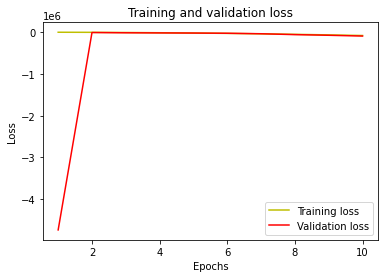

In [15]:

history=model.fit(x=x_train, 
          y=y_train,
          batch_size=8, 
          epochs=10,
          verbose=1,
          validation_data=(x_val, y_val))



#accuracy = model.evaluate(x_val, y_val)
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
model.save('membrane.h5')

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


/content/drive/MyDrive/REUProject2021/images_long_axis/validation_images/Val_Img_1.png
/content/drive/MyDrive/REUProject2021/images_long_axis/validation_images/Val_Img_1.png
/content/drive/MyDrive/REUProject2021/images_long_axis/validation_images/Val_Img_2.png
/content/drive/MyDrive/REUProject2021/images_long_axis/validation_images/Val_Img_2.png
/content/drive/MyDrive/REUProject2021/images_long_axis/validation_images/Val_Img_3.png
/content/drive/MyDrive/REUProject2021/images_long_axis/validation_images/Val_Img_3.png
/content/drive/MyDrive/REUProject2021/images_long_axis/validation_images/Val_Img_4.png
/content/drive/MyDrive/REUProject2021/images_long_axis/validation_images/Val_Img_4.png


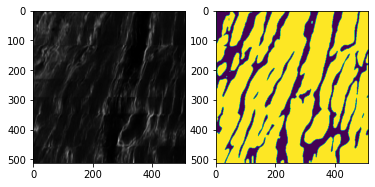

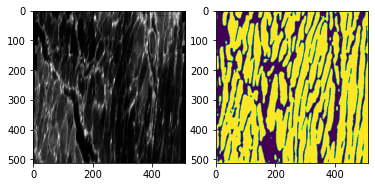

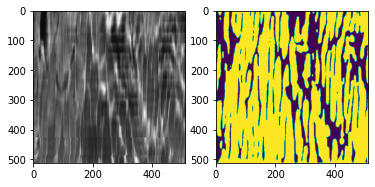

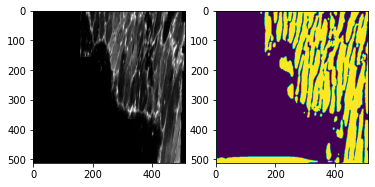

In [28]:
from tensorflow import keras
model = keras.models.load_model('membrane.h5', compile=False)

validation_img = '/content/gdrive/MyDrive/REUProject2021/images_long_axis/validation_images'
validation_mask = '/content/gdrive/MyDrive/REUProject2021/images/validation_masks'

prediction_images = []
for directory_path in glob.glob("/content/drive/MyDrive/REUProject2021/images_long_axis/validation_images"):
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
      print(img_path)
      f, axarr = plt.subplots(1,2)
      test_img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
      test_img = cv2.resize(test_img, (SIZE_Y, SIZE_X))
      test_img = cv2.cvtColor(test_img, cv2.COLOR_RGB2BGR)
      axarr[0].imshow(test_img)
      test_img = np.expand_dims(test_img, axis=0)
      prediction = model.predict(test_img)
      prediction_image = prediction.reshape(mask.shape)
      prediction_image = interval_mapping(prediction_image, 0.0, 1.0, 0, 255).astype('uint8')
      ret2, prediction_image = cv2.threshold(prediction_image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
      prediction_images.append(prediction_image)
      axarr[1].imshow(prediction_image)
      print(img_path)


In [19]:
SIZE_Y = 512
SIZE_X = 512
GT_path = '/content/gdrive/MyDrive/REUProject2021/images_long_axis/validation_masks/'

i = 1
for directory_path in glob.glob(GT_path):
    for img_path in glob.glob(os.path.join(directory_path, "*.tif")):
      curr_img = cv2.imread(img_path, 0)
      img = cv2.resize(curr_img, (SIZE_Y, SIZE_X))
      img_name = GT_path + "validation_mask_" + repr(i) + ".png"
      print(img_name)
      plt.figure()
      plt.imshow(img)
      plt.show()
      cv2.imwrite(img_name, img)
      i = i+1


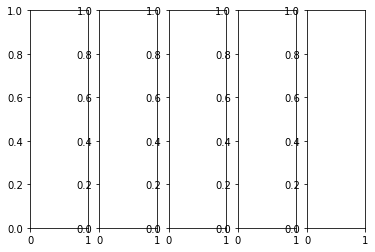

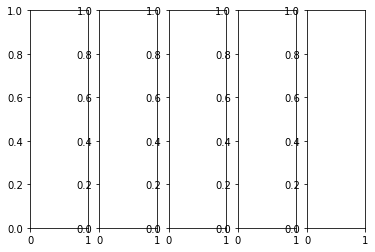

In [20]:
groundtruth = []
GT_path = '/content/gdrive/MyDrive/REUProject2021/images_long_axis/validation_masks'

for directory_path in glob.glob(GT_path):
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
      curr_img = cv2.imread(img_path, 0)
      print(img_path)
      groundtruth.append(curr_img)

f, axarr = plt.subplots(1,5)
for i in range(len(groundtruth)):
  axarr[i].imshow(groundtruth[i])

f, axarr = plt.subplots(1,5)
for i in range(len(groundtruth)):
  axarr[i].imshow(prediction_images[i])

for i in range(len(prediction_images)):
  y_pred = prediction_images[i]
  y_true = groundtruth[i]
  dice_score = dice(y_pred, y_true, k = 255) 
  print ("Dice Similarity: {}".format(dice_score))

In [ ]:
!mkdir -p saved_model
model.save('/content/drive/MyDrive/REUProject2021/images_short_axis/saved_model/my_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/REUProject2021/images_long_axis/saved_model/my_model/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
!mkdir -p /content/drive/MyDrive/REUProject2021/images_short_axis/checkpoints/
model.save_weights('/content/drive/MyDrive/REUProject2021/images_short_axis/checkpoints/my_checkpoint')

In [ ]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/REUProject2021/images_short_axis/saved_model/my_model')

# Check its architecture
new_model.summary()

OSError: ignored

In [ ]:
from skimage import io
import numpy as np
from tifffile import imsave

output_image = np.zeros((800, 512, 512), 'uint8')
output_path = '/content/gdrive/MyDrive/REUProject2021/images_long_axis/validation_stacks_results/'

for directory_path in glob.glob("/content/drive/MyDrive/REUProject2021/images_long_axis/validation_stacks"):
    for img_path in glob.glob(os.path.join(directory_path, "*.tif")):
      img = io.imread(img_path)
      print(img.shape)
      for i in range(img.shape[0]):
        curr_img = img[i]
        curr_img = cv2.resize(curr_img, (SIZE_Y, SIZE_X))
        curr_img = cv2.cvtColor(curr_img, cv2.COLOR_RGB2BGR)
        print(curr_img.shape)
        plt.imshow(curr_img)
        plt.show()
        curr_img = np.expand_dims(curr_img, axis=0)
        prediction = model.predict(curr_img)
        prediction_image = prediction.reshape(mask.shape)
        prediction_image = interval_mapping(prediction_image, 0.0, 1.0, 0, 255).astype('uint8')
        ret2, prediction_image = cv2.threshold(prediction_image,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
        output_image[i,:,:] = prediction_image
      imsave(img_path[0:len(img_path)-4:1] + '_SEGMENTED.tif', output_image)